In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import seaborn as sns
import efgs
from rdkit import Chem
from IPython.display import display, Image

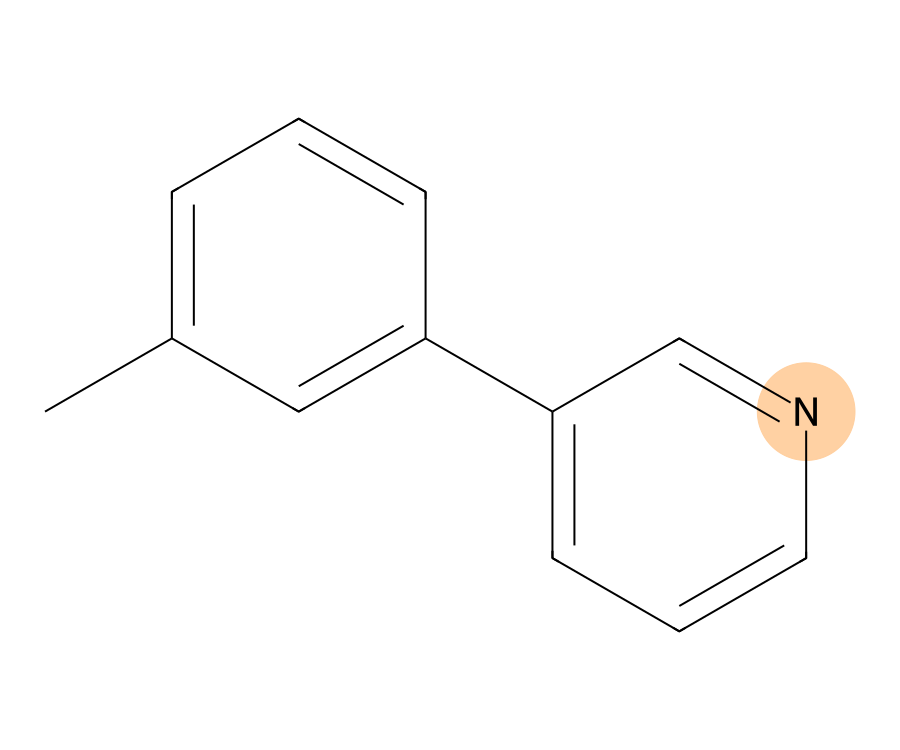

In [2]:
target_smiles = 'Cc1cccc(-c2cccnc2)c1'

target_mol = Chem.MolFromSmiles(target_smiles)

img_text, _, _, _ = efgs.get_dec_fgs(target_mol)

display(Image(data=img_text))

# save the image
with open(f"images/labeled_{target_smiles}.png", "wb") as f:
    f.write(img_text)

In [3]:
# Load chembl data
chembl_data = pd.read_csv('data/chembl_35_fg_scaf.csv')

In [4]:
# Convert the fgs column to lists with lambda function
chembl_data['fgs'] = chembl_data['fgs'].apply(lambda x: eval(x) if pd.notnull(x) else [])

In [5]:
chembl_data.head()

,smiles,inchikey,fgs,scaffolds
0,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=N\Nc1cccc(-c2cc...,IIBBJCNVTRCTDV-QYQHSDTDSA-N,"[O=C1C(=N[N]([R])[R])C=N[N]1[R], [OH][Car], [N...",*=C1C(=NNc2cccc(-c3cccc(-c4nnn[nH]4)c3)c2)C=NN...
1,COCC1c2c(cnn2C)CCN1Cc1ccc(C)cc1,CURLUINJKUTKLO-UHFFFAOYSA-N,"[[R][O][R], [R][N]([R])[R], [Nar], [Nar]]",c1ccc(CN2CCc3cn[nH]c3C2)cc1
2,COc1cccc(N(C)C(=O)c2ccc(-c3ccc(OC)c(F)c3)s2)c1,JJJNBNRLZNDSMT-UHFFFAOYSA-N,"[[R][O][R], O=[C]([R])[N]([R])[R], [R][O][R], ...",*=C(Nc1ccccc1)c1ccc(-c2ccccc2)s1
3,O=c1[nH]c2ccc(-c3csc(-c4ccc(F)c(F)c4)n3)cc2o1,FEPSUZQURINCPW-UHFFFAOYSA-N,"[[O]=[Car], [F][R], [F][R], [Nar], [Sar], [Nar...",*=c1[nH]c2ccc(-c3csc(-c4ccccc4)n3)cc2o1
4,Cc1cc(CC#N)cc(C)c1Nc1ccnc(Nc2ccc(C#N)cc2)n1,ZKXJVUBVZRGELZ-UHFFFAOYSA-N,"[C#N, [R][NH][R], [R][NH][R], C#N, [Nar], [Nar]]",c1ccc(Nc2ccnc(Nc3ccccc3)n2)cc1


In [3]:
# load curated data
curated_data = pd.read_pickle('data/chembl_35_fg_scaf_curated.pkl')

In [4]:
curated_data.head()

,smiles,inchikey,fgs,scaffolds,mol,mol_weight,fingerprint,fingerprint_array,fg_array
246142,N[C@@H](C[Se][Se]C[C@H](N)C(=O)O)C(=O)O,JULROCUWKLNBSN-IMJSIDKUSA-N,"[[NH2][Cal], [R][Se][Se][R], [NH2][Cal], O=[C]...",NaN,<rdkit.Chem.rdchem.Mol object at 0x31363e3e0>,334.092,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0]"
1611445,Nc1ccc(C(=O)Nc2ccccc2N2CCCCC2)o1,ZCPCVLKJEFTUSH-UHFFFAOYSA-N,"[[NH2][Car], O=[C]([R])[N]([R])[R], [R][N]([R]...",*=C(Nc1ccccc1N1CCCCC1)c1ccco1,<rdkit.Chem.rdchem.Mol object at 0x31363e430>,285.347,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1]"
952684,O=C(O)CCc1ccc(OCc2ccc(CN3CCC4(CCCCO4)CC3)cc2)cc1,JIVBMSPODOCBON-UHFFFAOYSA-N,"[O=[C](O)[R], [R][O][R], [R][N]([R])[R], [R][O...",c1ccc(OCc2ccc(CN3CCC4(CCCCO4)CC3)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x31363e480>,423.553,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0]"
1447366,COc1cccc(-c2ccc(Nc3ccc(CN(C)C)cc3)c(OC)c2F)c1,VDMBGVBPYJVMMO-UHFFFAOYSA-N,"[[R][O][R], [R][NH][R], [R][N]([R])[R], [R][O]...",c1ccc(Nc2ccc(-c3ccccc3)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x31363e4d0>,380.463,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0]"
624719,COc1cccc(/C=C/c2ccccc2)c1OC,LBCIRZACLFULBJ-VAWYXSNFSA-N,"[[R][O][R], [R][O][R], C=C]",C(=Cc1ccccc1)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x31363e520>,240.302,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0]"


Counter({'[R][NH][R]': 47396, 'O=[C](O)[R]': 20879, 'C=C': 15863, '[NH2][Car]': 15862})
Number of unique functional groups: 4


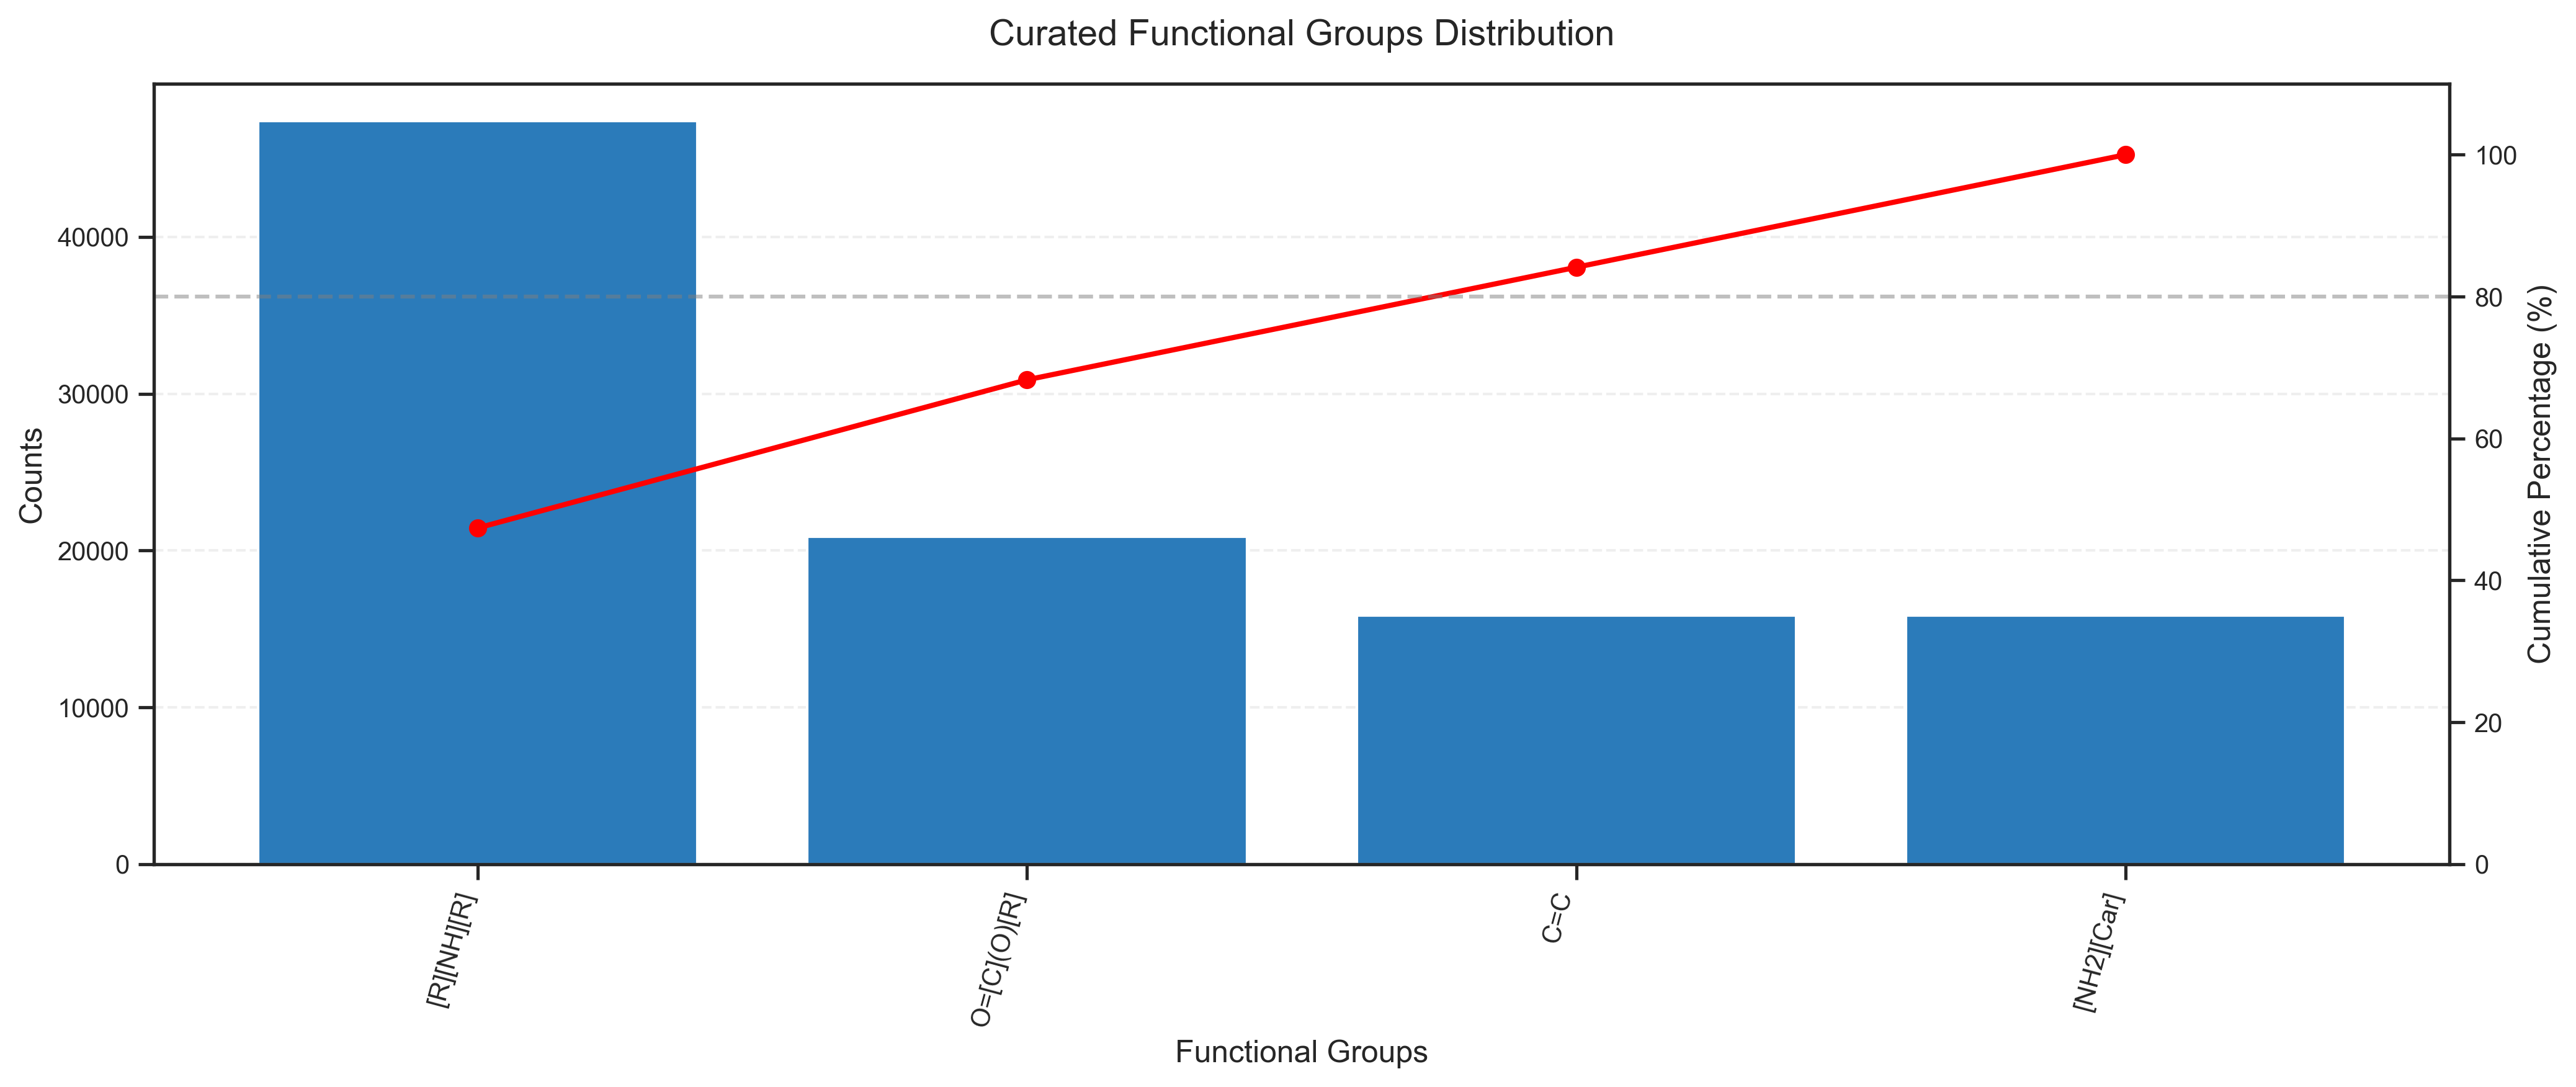

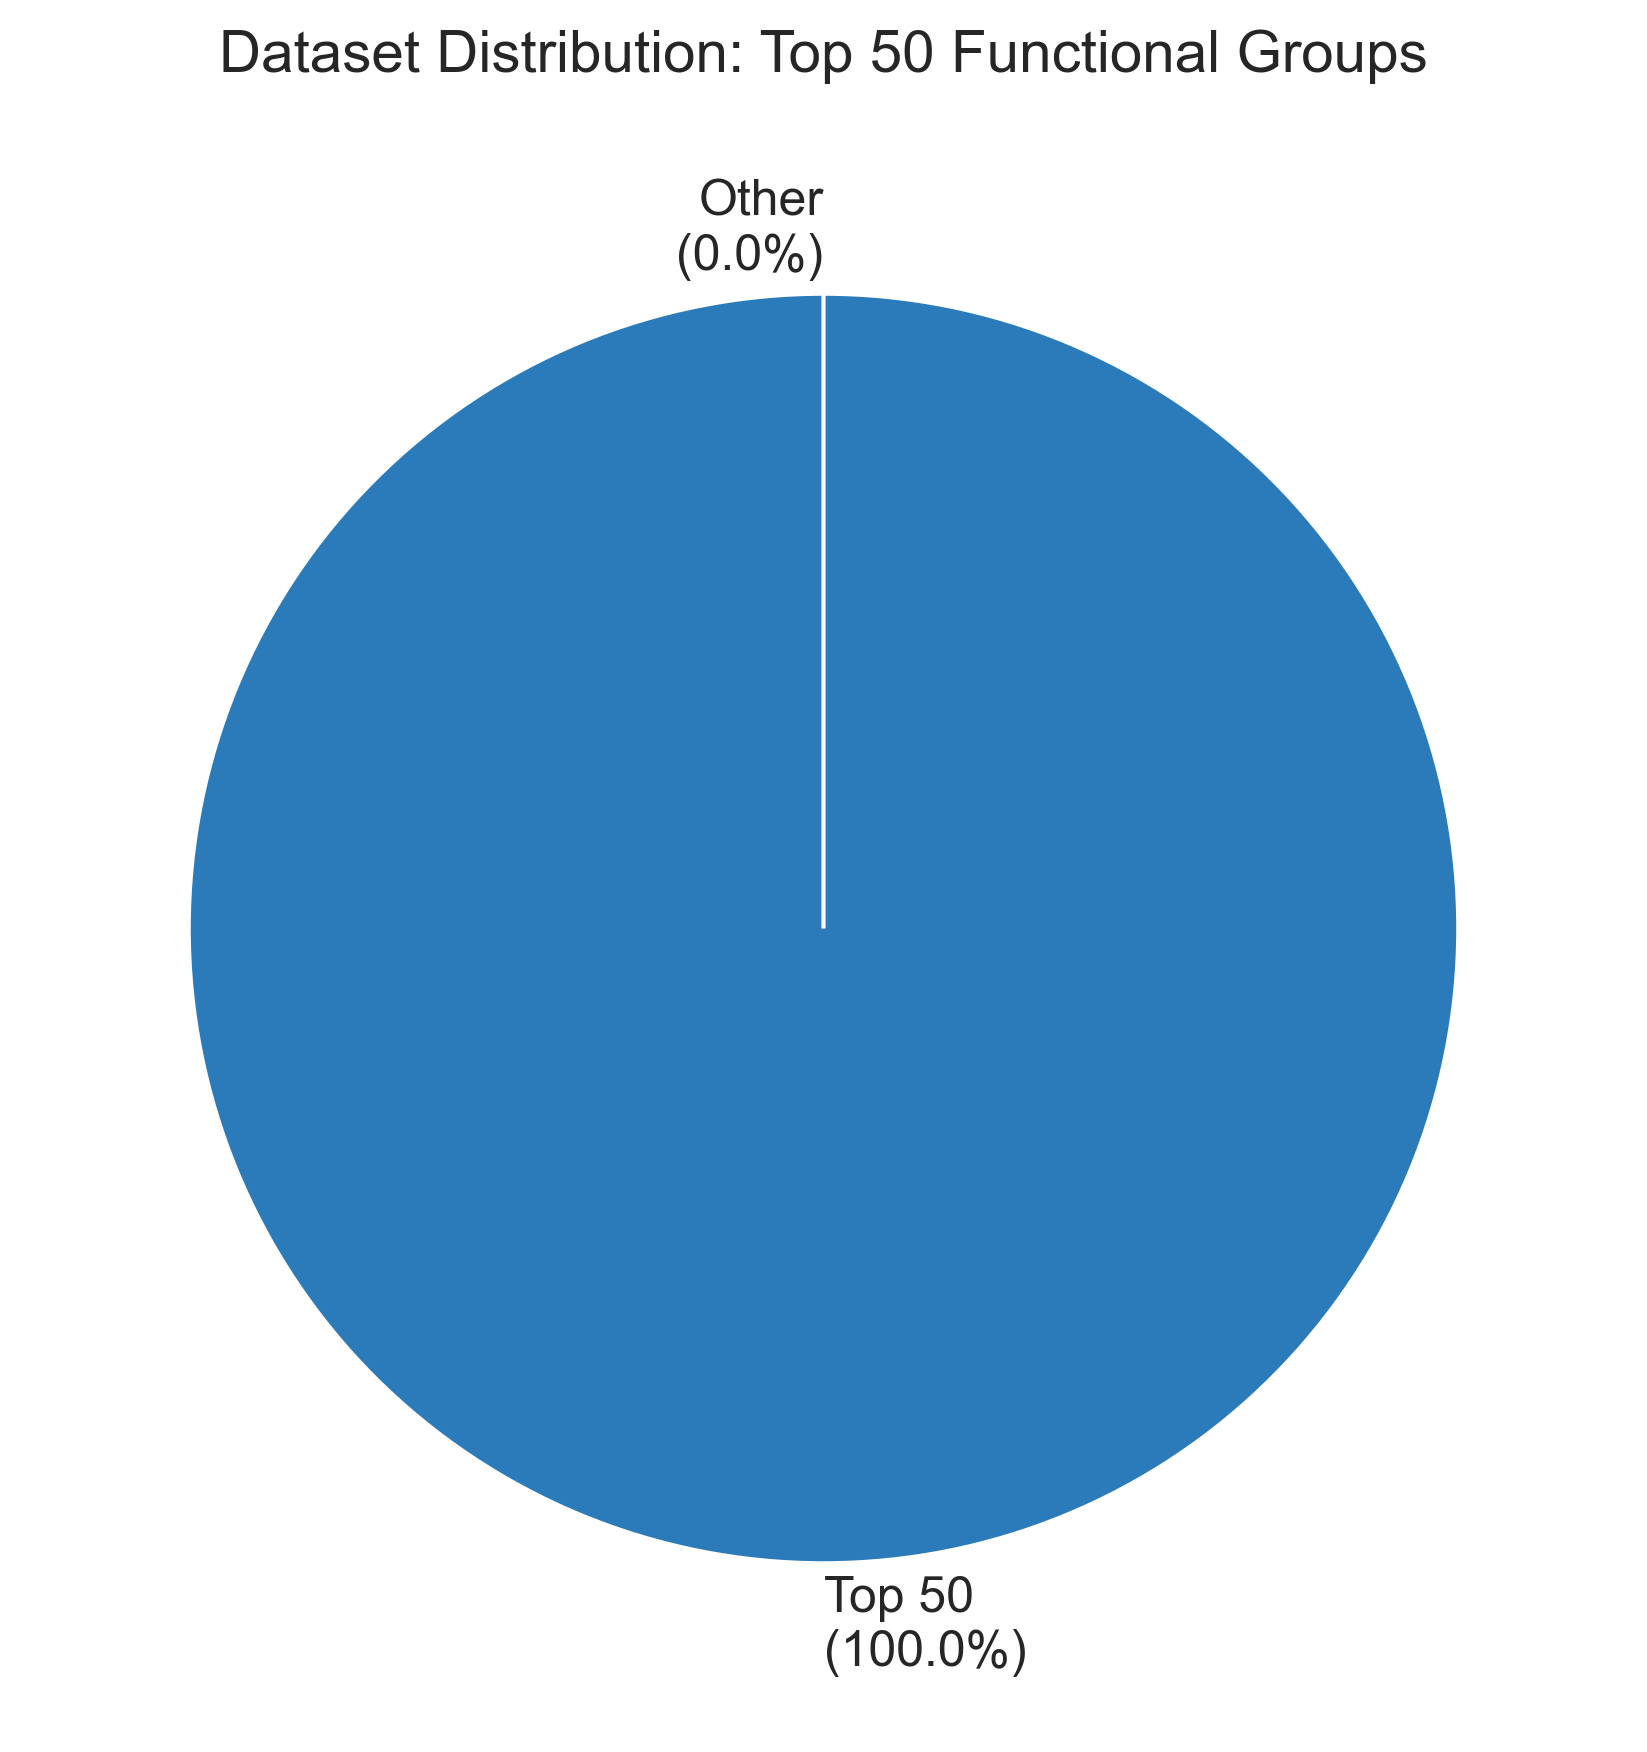

In [8]:
# Count functional groups
fg_counts = Counter()
curation_groups = ['[R][NH][R]', 'O=[C](O)[R]', 'C=C', '[NH2][Car]']
for fgs in curated_data['fgs']:
    # Only count curation groups once per molecule
    filtered_fgs = set(fg for fg in fgs if fg in curation_groups)
    fg_counts.update(filtered_fgs)

# print the counts
print(fg_counts)

# how many unique fgs
num_unique_fgs = len(fg_counts)

print(f"Number of unique functional groups: {num_unique_fgs}")

# Only keep top 50 for display
top_fg = dict(sorted(fg_counts.items(), key=lambda item: item[1], reverse=True)[:50])

labels = list(top_fg.keys())
values = np.array(list(top_fg.values()))
total_count = sum(fg_counts.values())

# Cumulative percentage (based on entire dataset)
cum_percentage = np.cumsum(values) / total_count * 100

# Style settings for cleaner thesis look
sns.set_theme(style="ticks")  # Removes background grid
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

fig, ax1 = plt.subplots(figsize=(14, 6), dpi=300)

# Bar chart with logarithmic y-axis
bars = ax1.bar(range(len(labels)), values, color=sns.color_palette("Blues")[4])
ax1.set_xlabel('Functional Groups')
ax1.set_ylabel('Counts')
ax1.set_xticks(range(len(labels)))
ax1.set_xticklabels(labels, rotation=75, ha='right')

# Add subtle horizontal grid only
ax1.yaxis.grid(True, linestyle='--', alpha=0.3)
ax1.xaxis.grid(False)

# Cumulative percentage line (on secondary y-axis, linear scale)
ax2 = ax1.twinx()
ax2.plot(range(len(labels)), cum_percentage, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)')
ax2.set_ylim(0, 110)
ax2.axhline(80, color='gray', linestyle='--', alpha=0.5)

plt.title('Curated Functional Groups Distribution', pad=15)
plt.tight_layout()

plt.savefig("images/top50_pareto_cur.png", dpi=300, bbox_inches='tight')

plt.show()


# Total counts
total_count = sum(fg_counts.values())
top_50_count = sum([count for _, count in fg_counts.most_common(50)])
rest_count = total_count - top_50_count

# Percentages
top_50_pct = top_50_count / total_count * 100
rest_pct = rest_count / total_count * 100

# Seaborn color palette
colors = [sns.color_palette("Blues")[4], sns.color_palette("pastel")[1]]

# High-resolution figure
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

# Only returns wedges and texts when autopct=None
wedges, texts = ax.pie(
    [top_50_count, rest_count],
    labels=[f"Top 50\n({top_50_pct:.1f}%)", f"Other\n({rest_pct:.1f}%)"],
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

# Style text
for text in texts:
    text.set_fontsize(12)

ax.set_title('Dataset Distribution: Top 50 Functional Groups', fontsize=14, pad=15)
plt.tight_layout()
plt.savefig("images/top50_pie.png", dpi=300, bbox_inches='tight')
plt.show()


In [16]:
# what percent of functional groups appear less than 100 times
num_fgs_less_100 = sum(1 for count in fg_counts.values() if count <= 100)
print(f"Count of functional groups appearing less than 100 times: {num_fgs_less_100}")

avg_length_less_100 = (
    sum(sum(1 for c in fg if c.isupper()) for fg in fg_counts if fg_counts[fg] < 100)
    / num_fgs_less_100
    if num_fgs_less_100 > 0 else 0
)
print(f"Average length of functional groups appearing less than 100 times: {avg_length_less_100:.2f}")

# print the first smiles of a functional group appearing less than 100 times
for idx, fgs in enumerate(chembl_data['fgs']):
    if any(fg_counts[fg] <= 1 for fg in fgs):
        print(f"First SMILES meeting criteria: {chembl_data['smiles'].iloc[idx]}")
        break

percent_fgs_less_100 = num_fgs_less_100 / num_unique_fgs * 100

print(f"Percentage of functional groups appearing less than 100 times: {percent_fgs_less_100:.2f}%")

# what percent is the most common fg
most_common_fg_count = max(fg_counts.values())
print(f"Count of the most common functional group: {most_common_fg_count}")
percent_most_common_fg = most_common_fg_count / total_count * 100

print(f"Percentage of the most common functional group: {percent_most_common_fg:.2f}%")


Count of functional groups appearing less than 100 times: 13962
Average length of functional groups appearing less than 100 times: 11.79
First SMILES meeting criteria: CS(=O)(=O)CN1C2=C(C(c3ccc(Br)cc3)Oc3ccccc32)C(c2ccc(Br)cc2)n2ncnc21
Percentage of functional groups appearing less than 100 times: 95.43%
Count of the most common functional group: 3188978
Percentage of the most common functional group: 24.99%
